## 0. Install and Import Dependencies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pip install easyocr
!pip install imutils

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

## 1. Read in Image, Grayscale and Blur

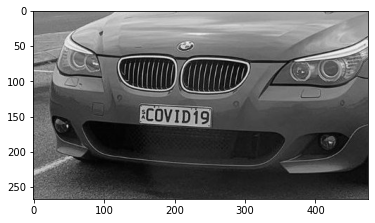

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Dataset/car images/image2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

## 2. Apply filter and find edges for localization

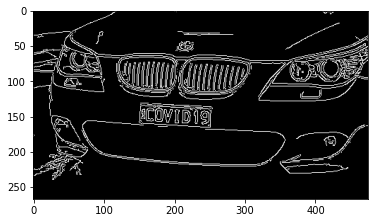

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## 3. Find Contours and Apply Mask

In [ ]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [ ]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [ ]:
location

array([[[152, 136]],

       [[248, 139]],

       [[251, 164]],

       [[153, 160]]], dtype=int32)

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

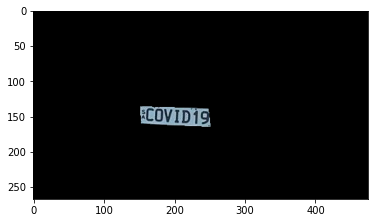

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

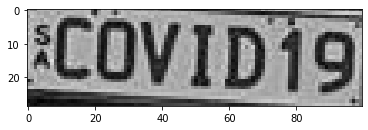

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

## 4. Use Easy OCR To Read Text

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 0], [100, 0], [100, 29], [0, 29]], 'ICOVIDT9', 0.5275641079442608)]

## 5. Render Result

In [ ]:
text = result[0][-2]

font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res=cv2.putText(img=img, text='', org=(0, 250), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=1, color=(0, 255, 0),thickness=3)


res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [ ]:
#https://www.carregistrationapi.in/API/reg.asmx/CheckIndia?RegistrationNumber=kl41q5001&username=saintmantis
import requests
url = f"https://www.carregistrationapi.in/API/reg.asmx/CheckIndia?RegistrationNumber=kl41q5001&username={text}"
response = requests.request("GET", url)
print(response.text)

<?xml version="1.0" encoding="utf-8"?>
<Vehicle xmlns:xsd="http://www.w3.org/2001/XMLSchema" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns="http://regcheck.org.uk">
  <vehicleJson>{
  "Description": "MERCEDES E 220 D (1950CC)",
  "RegistrationYear": "2019",
  "CarMake": {
    "CurrentTextValue": "MERCEDES"
  },
  "CarModel": {
    "CurrentTextValue": "E 220 D (1950CC)"
  },
  "Variant": "",
  "EngineSize": {
    "CurrentTextValue": "1950"
  },
  "MakeDescription": {
    "CurrentTextValue": "MERCEDES"
  },
  "ModelDescription": {
    "CurrentTextValue": "E 220 D (1950CC)"
  },
  "NumberOfSeats": {
    "CurrentTextValue": ""
  },
  "VechileIdentificationNumber": "",
  "EngineNumber": "",
  "FuelType": {
    "CurrentTextValue": ""
  },
  "RegistrationDate": "29/07/2019",
  "Owner": "",
  "Fitness": "",
  "Insurance": "11/07/2021",
  "PUCC": "",
  "VehicleType": "",
  "Location": "KERALA-ALUVA",
  "ImageUrl": "http://www.carregistrationapi.in/image.aspx/@TUVSQ0VERVMgRSAyMjAgR

In [ ]:
pip install xmltodict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import json
import xmltodict

data_dict = xmltodict.parse(response.text)
json_data = json.dumps(data_dict) 


In [ ]:
json_object = json.loads(json_data)
print(json_object["Vehicle"]['vehicleJson'])


{
  "Description": "MERCEDES E 220 D (1950CC)",
  "RegistrationYear": "2019",
  "CarMake": {
    "CurrentTextValue": "MERCEDES"
  },
  "CarModel": {
    "CurrentTextValue": "E 220 D (1950CC)"
  },
  "Variant": "",
  "EngineSize": {
    "CurrentTextValue": "1950"
  },
  "MakeDescription": {
    "CurrentTextValue": "MERCEDES"
  },
  "ModelDescription": {
    "CurrentTextValue": "E 220 D (1950CC)"
  },
  "NumberOfSeats": {
    "CurrentTextValue": ""
  },
  "VechileIdentificationNumber": "",
  "EngineNumber": "",
  "FuelType": {
    "CurrentTextValue": ""
  },
  "RegistrationDate": "29/07/2019",
  "Owner": "",
  "Fitness": "",
  "Insurance": "11/07/2021",
  "PUCC": "",
  "VehicleType": "",
  "Location": "KERALA-ALUVA",
  "ImageUrl": "http://www.carregistrationapi.in/image.aspx/@TUVSQ0VERVMgRSAyMjAgRCAoMTk1MENDKQ=="
}
